# Module Title: Advanced data analytics
### Module Code: B8IT109
### Module Leader: Darren Redmond/ Amit Sharma
### Assessment Title: CA 2

### Student Name: Nicholas Godwin Udomboso
### Student Number: 10547333
### Kaggle Email: ideylearn@gmail.com
### User Name/Display Name on Kaggle:ideylearn
### Account (User ID 6712774): 6712774
### Score on Kaggle: 80%
### filename on Kaggle: submission_nic8.csv

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing titanic training and test datasets

In [2]:
train_dataset=pd.read_csv('train.csv', skipinitialspace = True)
test_dataset=pd.read_csv('test.csv', skipinitialspace = True)

## Performing data exploration

In [3]:
#the training dataset has 891 records of unique passengers
train_dataset.shape 

(891, 12)

In [4]:
#the test dataset has 418 records of unique passengers
test_dataset.shape 

(418, 11)

In [5]:
#549 passengers did not survive; #342 passengers survived
train_dataset['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

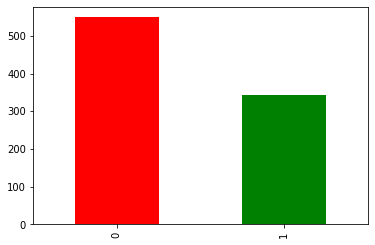

In [6]:
#Plotting a bar chart for a graphical display of those that survived and those that did not
#The red bar shows the 549 passengers that did not survive
#The green bar shows the 342 passengers that survived
train_dataset.Survived.value_counts().plot(kind='bar',color=['red','green'])

In [7]:
#to show class of tickets and the number of passengers per ticket category
#216 passengers have 1st class ticket, 184 have 2nd class ticket and 491 have 3rd class ticket
train_dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

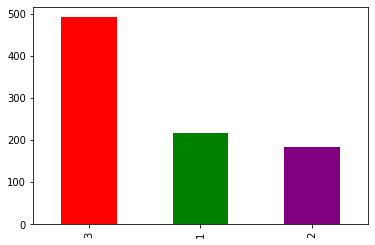

In [8]:
#Plotting graph to show the number of passengers per ticket class
#the graph shows that the majority of the passengers boarded with 3rd class ticket
train_dataset.Pclass.value_counts().plot(kind='bar',color=['red','green','purple'])

In [9]:
#to show the male and female population in the training dataset
#shows 577 males and 314 females
train_dataset['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

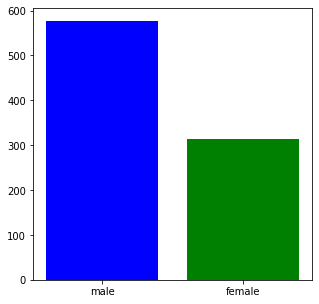

In [10]:
#The graph shows more male population than females in the training dataset
plt.figure(figsize=(5,5))
plt.bar(list(train_dataset['Sex'].value_counts().keys()),list(train_dataset['Sex'].value_counts()),color=['blue','green'])
plt.show()

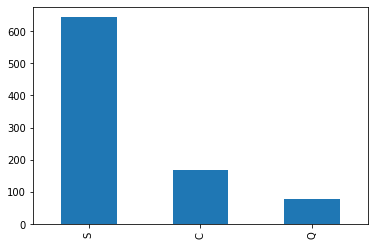

In [11]:
#passenger count per boarding location
train_dataset.Embarked.value_counts().plot(kind='bar')

## Preprocessing the dataset

In [12]:
# Setting index on each dataset before merging
train_dataset = train_dataset.set_index("PassengerId")
test_dataset = test_dataset.set_index("PassengerId")

In [13]:
# merging the training and test dataset
data1 = pd.concat([train_dataset, test_dataset], axis=0, sort=False)

data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#to check the datatypes of the variables
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [15]:
#to check columns with missing values
#Age,Fare,Cabin,and Embarked columns have missing values
#Null values in the Survived column is as a result of the merging of the training and test datasets

data1.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [16]:
#Embarked column

#Observing  the rows in Embarked column with null values
#the rows with null values in Embarked columns had 1st class ticket passengers and they paid $80 Fare

data1[data1['Embarked'].isnull()]#PassengerId=62,830

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
#Below output shows a median of approx. $77 Fare for passengers with 1st class tickets that embarked from point C
#The Fare value of $77 at point C is the closest to the $80 Fare that the passengers with the null values in Embarked column paid
#so we can conclude that the two passengers Embarked from C

data1.groupby(by=["Embarked","Pclass"]).median()

Survived   Age  SibSp  Parch     Fare
Embarked Pclass                                       
C        1            1.0  39.0    0.0    0.0  76.7292
         2            1.0  26.0    0.5    0.0  15.3146
         3            0.0  20.5    0.0    0.0   7.8958
Q        1            0.5  37.0    1.0    0.0  90.0000
         2            1.0  57.0    0.0    0.0  12.3500
         3            0.0  24.0    0.0    0.0   7.7500
S        1            1.0  39.0    0.0    0.0  52.0000
         2            0.0  29.0    0.0    0.0  15.3750
         3            0.0  24.0    0.0    0.0   8.0500

In [18]:
#so the null values in Embarked column is replaced with C

data1['Embarked'].fillna('C', inplace = True)

## Performing data analysis

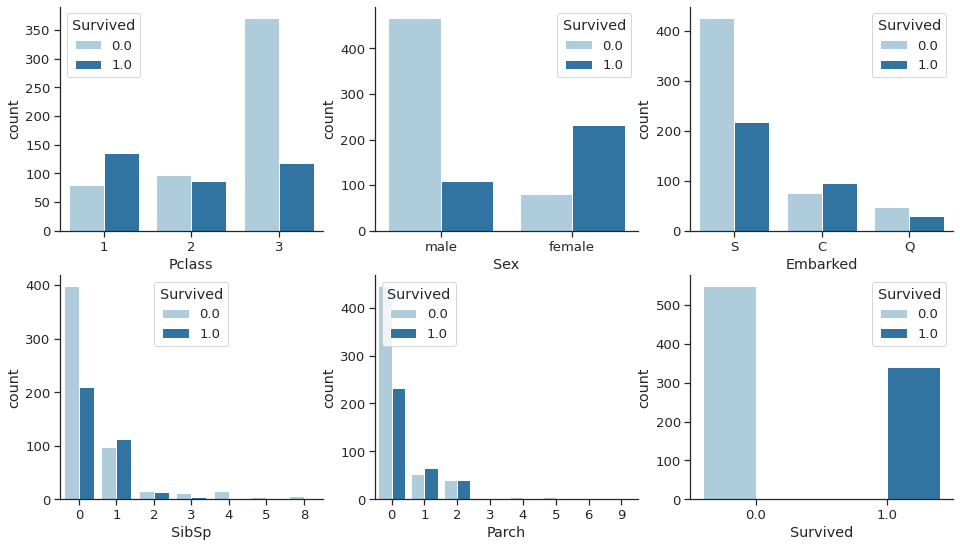

In [19]:
#Plot to compare numeric columns against Survived column to understand the behavior. 
#Below plot shows how passengers survived with respect to other variables in the dataset

cols = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, j in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data1, x=j, hue='Survived', palette='Paired')
    
sns.despine()

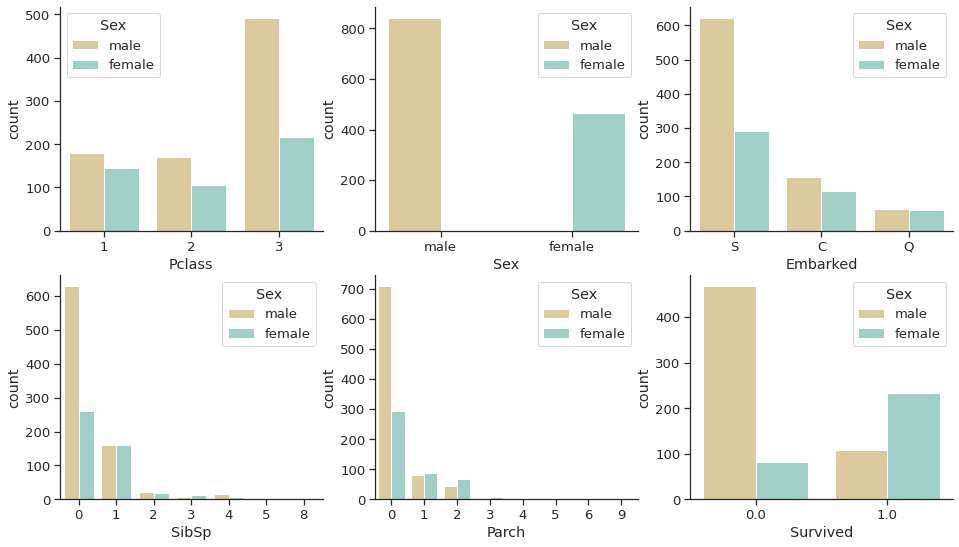

In [20]:
#Below plot shows how the passengers gender affected the surviva in relation to other variables in the dataset

cols = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, j in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data1, x=j, hue='Sex', palette='BrBG')
    
sns.despine()

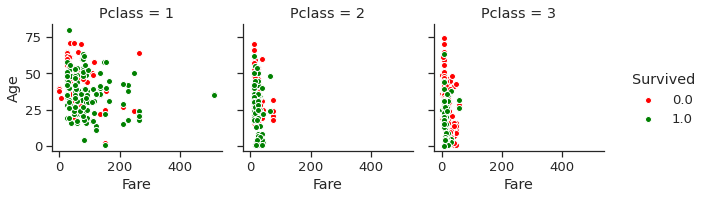

In [21]:
#In the below scatter plot, we observe more green datapoints in the 1st class than in other ticket classes
#That shows that people with 1st class ticket had more survival rate than others
g = sns.FacetGrid(data1, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"green", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

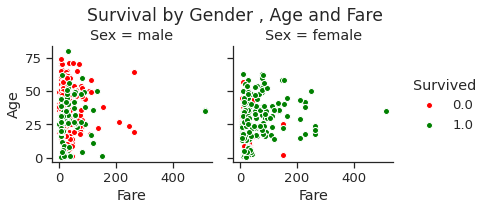

In [22]:
#In the plot below we observe more green datapoints for the females, and 
#more cluster of green datapoints is observed for ages between 20 and 40.
#This means that the females, younger ones and those with higher fares survived more
g = sns.FacetGrid(data1, hue="Survived", col="Sex", margin_titles=True,
                  palette={1:"green", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


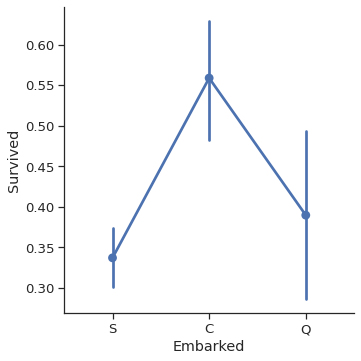

In [23]:
#Passengers that embarked at location C show higher chance of survival in the plot
sns.factorplot(x="Embarked", y="Survived",  data=data1);

In [24]:
#correlation of variables with the Survived variable
data1.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

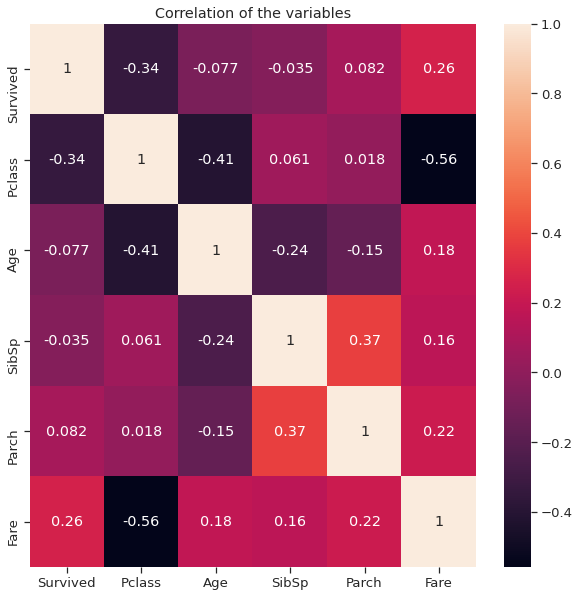

In [25]:
#The Heatmap plot shows that Fare variable has the strongest positive correlation with the Survived variable
corr=data1.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr,annot=True,linecolor="white")
plt.title('Correlation of the variables');

## Preprocessing the dataset (contd)

In [26]:
#processing embarked column
#to change the Sex and Embarked columns to numeric. 
#Sex column has two values, Female and Male. Embarked column has tree labels S, C and Q.

# Sex
types = {'female':0,'male':1}
data1.Sex = data1.Sex.map(types)

# Embarked
types = {'S':0,'C':1,'Q':2}
data1.Embarked = data1.Embarked.map(types)

In [27]:
#processing Age column

# The missing values in Age can be imputed with mean, median or mode

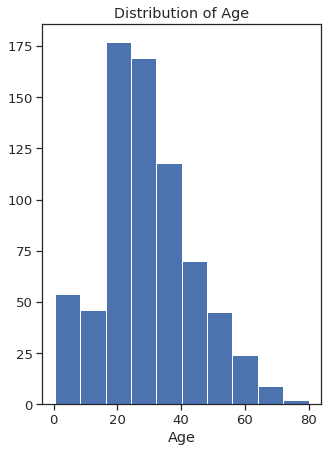

In [28]:
#histogram plot to understand Age distribution of the passengers
#the plot shows that majority of the passengers were young, between 20 and 40
plt.figure(figsize=(5,7))
plt.hist(train_dataset['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [29]:
#to observe the age groups of passengers by ticket class, by gender and by survival category
data1.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex  Survived
1       0    0.0         25.0
             1.0         35.0
        1    0.0         45.5
             1.0         36.0
2       0    0.0         32.5
             1.0         28.0
        1    0.0         30.5
             1.0          3.0
3       0    0.0         22.0
             1.0         19.0
        1    0.0         25.0
             1.0         25.0
Name: Age, dtype: float64

In [30]:
#Filling the missing values in Age column with the average age of passengers by Pclass and by gender.

data1["Age"].fillna(data1.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)

In [31]:
#grouping the passengers into age groups

agegroup = pd.cut(data1['Age'], 4)

In [32]:
# converting Age column to categorical by encoding with labelencoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data1['Age'] = LabelEncoder().fit_transform(agegroup) 

In [33]:
#survival rate per age group

pd.crosstab(data1['Age'], data1['Survived'])

Survived,0.0,1.0
Age,,
0,97,82
1,341,200
2,94,55
3,17,5


In [34]:
#processing the Fare column
#Fare column has missing value
#to impute the missing value with median

data1["Fare"].fillna(data1.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

In [35]:
#to group the fares
#and convert fare column to categorical by encoding with labelencoder
#and observe the survival rate per fare group

faregroup = pd.cut(data1['Fare'],5)
data1['Fare'] = LabelEncoder().fit_transform(faregroup)
pd.crosstab(data1['Fare'], data1['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [36]:
#to process Cabin column
#Cabin column
#Cabin column has many missing values, So it can be dropped.

data1.Cabin.isnull().sum()

1014

In [37]:
data1.drop(['Cabin'], axis = 1, inplace = True)

In [38]:
#Extracting Titles of the passengers
data1['Title'] = data1.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [39]:
data1.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Jonkheer      1
Lady          1
Mme           1
Sir           1
Don           1
Capt          1
Countess      1
Dona          1
Name: Title, dtype: int64

In [40]:
#Processing the passengers titles.


least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

data1.Title = data1.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')

data1.Title = data1.Title.replace(['Countess','Dona'], 'Mrs')

data1.Title = data1.Title.replace(['Don','Sir'], 'Mr')

data1.Title = data1.Title.replace(least_occuring,'Rare')

data1.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [41]:
pd.crosstab(data1['Title'], data1['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,132
Mr,437,82
Mrs,26,100
Rare,14,5


In [42]:
#encoding the title column

data1['Title'] = LabelEncoder().fit_transform(data1['Title']) 

In [43]:
#processing SibSp and Parch columns
#Calculating total number of each family by adding SibSp,Parch columns and (1) for the passenger.

data1['FamilySize'] = data1['SibSp'] + data1['Parch']+1
data1.drop(['SibSp','Parch'], axis = 1, inplace = True)

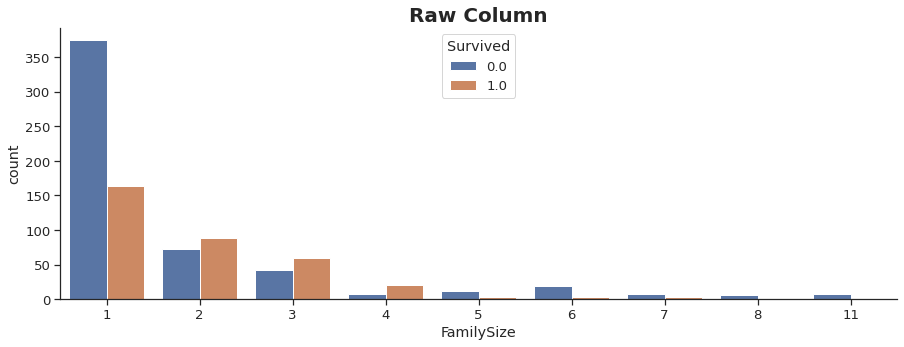

In [44]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=data1).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [45]:
# grouping the FamilySize column
data1.loc[ data1['FamilySize'] == 1, 'FamilySize'] = 0                            # Alone
data1.loc[(data1['FamilySize'] > 1) & (data1['FamilySize'] <= 4), 'FamilySize'] = 1  # Small Family 
data1.loc[(data1['FamilySize'] > 4) & (data1['FamilySize'] <= 6), 'FamilySize'] = 2  # Medium Family
data1.loc[data1['FamilySize']  > 6, 'FamilySize'] = 3

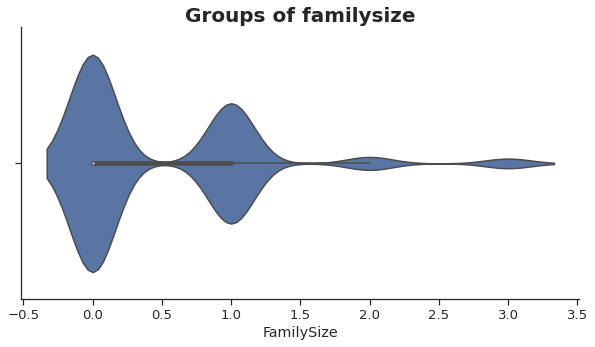

In [46]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.violinplot(x='FamilySize', hue='Survived', data=data1).set_title("Groups of familysize",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [47]:
#Extracting the passengers ticket's number

data1['Ticket'] = data1.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])

In [48]:
data1.Ticket = data1.Ticket.values.astype('int64')

In [49]:
#Extracting the Last Name of each passenger

data1['LastName'] = last= data1.Name.str.extract('^(.+?),', expand = False)

In [50]:
#Finding passengers that are women or children

data1['WnC'] = ((data1.Title == 0) | (data1.Sex == 0))
data1['WnC']

PassengerId
1       False
2        True
3        True
4        True
5       False
        ...  
1305    False
1306     True
1307    False
1308    False
1309     True
Name: WnC, Length: 1309, dtype: bool

In [51]:
#creating new columns for Family survival rate analysis

family = data1.groupby([data1.LastName, data1.Pclass, data1.Ticket]).Survived

data1['FTotalCount'] = family.transform(lambda s: s[data1.WnC].fillna(0).count())
data1['FTotalCount'] = data1.mask(data1.WnC, (data1.FTotalCount - 1), axis=0)

data1['FSurvivedCount'] = family.transform(lambda s: s[data1.WnC].fillna(0).sum())
data1['FSurvivedCount'] = data1.mask(data1.WnC, data1.FSurvivedCount - data1.Survived.fillna(0), axis=0)

data1['FSurvivalRate'] = (data1.FSurvivedCount / data1.FTotalCount.replace(0, np.nan))


In [52]:
#checking for columns with outstanding null values
data1.isnull().sum()

Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
LastName             0
WnC                  0
FTotalCount        245
FSurvivedCount     245
FSurvivalRate     1014
dtype: int64

In [53]:
# replacing the null values in the newly created columns
data1.FSurvivalRate.fillna(0, inplace = True)
data1.FTotalCount.fillna(0, inplace = True)
data1.FSurvivedCount.fillna(0, inplace = True)

In [54]:
data1.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize,LastName,WnC,FTotalCount,FSurvivedCount,FSurvivalRate
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,1,21171,0,0,2,1,Braund,False,0.0,0.0,0.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,17599,0,1,3,1,Cumings,True,0.0,0.0,0.0
3,1.0,3,"Heikkinen, Miss. Laina",0,1,3101282,0,0,1,0,Heikkinen,True,0.0,0.0,0.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,113803,0,0,3,1,Futrelle,True,0.0,0.0,0.0
5,0.0,3,"Allen, Mr. William Henry",1,1,373450,0,0,2,0,Allen,False,0.0,0.0,0.0


### Feature reduction

In [55]:
data1['PassengerId'] = data1.index

In [56]:
data1 = pd.get_dummies(data1, columns=['Sex','Fare','Pclass'])

In [57]:
data1.drop(['Name','LastName','WnC','FTotalCount','FSurvivedCount','Embarked','Title'], axis = 1, inplace = True)

In [58]:
data1.columns

Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'FSurvivalRate',
       'PassengerId', 'Sex_0', 'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [59]:
data1.head()

,Survived,Age,Ticket,FamilySize,FSurvivalRate,PassengerId,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
1,0.0,1,21171,1,0.0,1,0,1,1,0,0,0,0,0,1
2,1.0,1,17599,1,0.0,2,1,0,1,0,0,0,1,0,0
3,1.0,1,3101282,0,0.0,3,1,0,1,0,0,0,0,0,1
4,1.0,1,113803,1,0.0,4,1,0,1,0,0,0,1,0,0
5,0.0,1,373450,0,0.0,5,0,1,1,0,0,0,0,0,1


## Splitting the dataset back to the original Training set and Test set

In [60]:
train, test = data1.loc[train_dataset.index], data1.loc[test_dataset.index]

X_train = train.drop(['PassengerId','Survived'], axis = 1)
y_train = train["Survived"]
train_cols = X_train.columns

X_test = test.drop(['PassengerId','Survived'], axis = 1)

In [61]:
X_train.shape

(891, 13)

In [62]:
X_test.shape

(418, 13)

## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training the Training set

In [64]:
##Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Accuracy Score

In [65]:
from sklearn.metrics import accuracy_score
classifier.score(X_train, y_train)
classifier1 = round(classifier.score(X_train, y_train) * 100, 2)
classifier1

99.1

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
y_pred.shape

(418,)

## Applying k-Fold Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.49 %
Standard Deviation: 2.34 %


## Creating submission.csv file

In [69]:
testfile=pd.read_csv('test.csv', skipinitialspace = True)

In [70]:
submission = pd.DataFrame({
        "PassengerId": testfile["PassengerId"],
        "Survived": y_pred
    })

In [71]:
submission=submission.astype(int)

In [72]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
submission.to_csv('submission_nic8.csv', index=False)

# References:
#### 1.	Overcoming Techniques., Overcoming Class Imbalance using SMOTE Techniques. Analytics Vidya. Available at:  https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ (Accessed 1 May 2021).

#### 2.	Brownlee, J., SMOTE for Imbalanced Classification with Python. Available at:  https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ (Accessed 30 April 2021).

#### 3.	Kaggle.com., Titanic - Feature understanding from Plots. Available at:  	https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots (Accessed 29 April 2021).

#### 4.	Kaggle.com., Titanic (Top 3%). Available at: https://www.kaggle.com/javiervallejos/titanic-top-3 (Accessed 30 April 2021).

#### 5.	Kaggle.com., Titanic - Advanced Feature Engineering Tutorial. Available at: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial (Accessed 30 April 2021).

#### 6.		Scikit-learn.org., Titanic - Advanced Feature Engineering Tutorial. Available at: https://scikit-learn.org/stable/modules/classes.html (Accessed 29 April 2021).

#### 7. Waqas,I.,(2015), Journal of Computer Science & Systems Biology., Treatment of Missing Values in Data Mining.